<a href="https://colab.research.google.com/github/spdsp04/Telecom_Churn_Prediction_Group_Case_Study/blob/main/Telecom_Chrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Prediction Group Case Study

## Business problem

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

- So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn.

In [345]:
# Supress Warnings

import warnings
warnings.filterwarnings(action="ignore")

In [385]:
# import required Libraries

import pandas as pd # improt pandas
pd.set_option("display.max_columns",None) # for max columns
pd.set_option("display.max_rows",None) # for max rows

import datetime as dt # for date and time

import numpy as np # import numpy

import matplotlib.pyplot as plt # import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 

import seaborn as sns # import seaborn
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm 
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,plot_roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,cross_val_score,RandomizedSearchCV

In [347]:
# Checking versions of Libraries
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.21.5 | Pandas version: 1.3.5 | Seaborn version: 0.11.2'

## Importing Datasets both train and test set

In [348]:
train_url = 'https://raw.githubusercontent.com/spdsp04/Telecom_Churn_Prediction_Group_Case_Study/main/train.csv'
chrun_train = pd.read_csv(train_url, encoding = 'unicode_escape')
chrun_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.09,204.99,1.01,0.00,0.00,0.00,8.20,0.63,0.00,0.38,0.00,0.00,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.00,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.00,0.00,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,

In [349]:
test_url = 'https://raw.githubusercontent.com/spdsp04/Telecom_Churn_Prediction_Group_Case_Study/main/test.csv'
chrun_test = pd.read_csv(test_url, encoding = 'unicode_escape')
chrun_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,91.88,65.33,64.44,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.00,0.00,0.00,0.00,0.00,0.00,48.93,7.68,28.48,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,414.17,515.57,360.87,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/

In [350]:
# checking size of dataset
print(chrun_train.shape)
print(chrun_test.shape)

(69999, 172)
(30000, 171)


In [351]:
# checking for one missing column of test dataset
train_columns = chrun_train.columns
test_columns = chrun_test.columns
print(set(train_columns)-set(test_columns))

{'churn_probability'}


- Chrun_probabilty column is missing in test dataset
- Meaning of word Churn here what we assume :

User who have not done any utilization, either approaching or active - as far as calls, web and so on throughout some undefined time frame.

## Exploratory Data Analysis

In [352]:
# checking for duplicate rows dataset
print(chrun_train.duplicated().value_counts()) # for train dataset
print(chrun_test.duplicated().value_counts()) # for test dataset

False    69999
dtype: int64
False    30000
dtype: int64


- No duplicte rows found neither in train nor in test dataset.

In [353]:
# Checking null values (in percentage) and unique values (in numbers) parallelly for train dataset
pd.options.display.float_format = '{:.2f}'.format # for percentage values up to two decimal places
null_unique_train = pd.DataFrame()
#null_unique_train ['null_values'] = pd.DataFrame((chrun_train.isnull().sum()/len(chrun_train))
#*100).sort_values('null_values',ascending = False)
null_unique_train ['null_values'] = pd.DataFrame((chrun_train.isnull().sum()/len(chrun_train))*100)
null_unique_train ['unique_values'] = pd.Series(chrun_train.nunique())
print(null_unique_train.transpose())

                    id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
null_values       0.00       0.00            1.00            1.00   
unique_values 69999.00       1.00            1.00            1.00   

               loc_ic_t2o_mou  last_date_of_month_6  last_date_of_month_7  \
null_values              1.00                  0.00                  0.57   
unique_values            1.00                  1.00                  1.00   

               last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  \
null_values                    1.05     0.00     0.00     0.00         3.95   
unique_values                  1.00 61615.00 61425.00 60194.00     20057.00   

               onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
null_values           3.84         5.29          3.95          3.84   
unique_values     20076.00     19725.00      26254.00      26139.00   

               offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
null_values            5.29     

In [354]:
# Checking null values (in percentage) and unique values (in numbers) values parallelly for test dataset
pd.options.display.float_format = '{:.2f}'.format # for percentage values up to two decimal places
null_unique_test = pd.DataFrame()
null_unique_test ['null_values'] = pd.DataFrame((chrun_test.isnull().sum()/len(chrun_test))*100)
null_unique_test ['unique_values'] = pd.Series(chrun_test.nunique())
print(null_unique_test.transpose())

                    id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
null_values       0.00       0.00            1.05            1.05   
unique_values 30000.00       1.00            1.00            1.00   

               loc_ic_t2o_mou  last_date_of_month_6  last_date_of_month_7  \
null_values              1.05                  0.00                  0.67   
unique_values            1.00                  1.00                  1.00   

               last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  \
null_values                    1.22     0.00     0.00     0.00         3.90   
unique_values                  1.00 27493.00 27406.00 26871.00     12283.00   

               onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
null_values           3.91         5.58          3.90          3.91   
unique_values     12176.00     12054.00      16382.00      16151.00   

               offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
null_values            5.58     

- There have been few columns such as 'circle id' with single values throughout the column. idealy these are column only as they do not impart any inference while model building.

- few columns have very high percentage of null values ~75%. these needs imputation.

- columns with ~4% null values can be imputed mean/median/mode or whatever.
- Four coluns ('circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou') can be dropped as they nothing to with prediction.

In [355]:
# Dropping useless columns 
# checking size of dataset
print(chrun_train.shape)
print(chrun_test.shape)
chrun_train = chrun_train.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis=1) # droipping four columns from train dataset
chrun_test = chrun_test.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis=1) # droipping four columns from test dataset
# checking size of dataset
print(chrun_train.shape)
print(chrun_test.shape)


(69999, 172)
(30000, 171)
(69999, 168)
(30000, 167)


### Imputation

In [356]:
# look at missing values 
pd.options.display.float_format = '{:.2f}'.format
missing_values_train = pd.DataFrame((chrun_train.isnull().sum()/len(chrun_train))*100).reset_index().rename(columns = {'index': 'column_name', 0: '%age_of_Missing_values'}).sort_values('%age_of_Missing_values',ascending = False)
missing_values_test = pd.DataFrame((chrun_test.isnull().sum()/len(chrun_test))*100).reset_index().rename(columns = {'index': 'column_name', 0: '%age_of_Missing_values'}).sort_values('%age_of_Missing_values',ascending = False)
missing_values_train.transpose()

,142,139,160,145,130,115,118,127,121,124,140,122,161,146,119,116,143,128,125,131,123,141,144,162,147,132,129,117,126,120,54,57,51,63,66,87,72,75,78,81,93,96,99,45,48,84,69,42,36,30,27,24,21,18,39,33,12,9,15,94,79,82,31,85,7,91,16,97,10,25,76,22,13,19,28,46,34,70,61,64,40,37,67,52,55,43,49,73,62,44,23,8,20,41,11,56,50,17,77,53,14,26,92,47,86,71,83,35,32,29,95,80,65,98,38,74,68,111,110,109,3,2,164,165,166,153,159,158,157,152,163,156,155,148,154,150,151,149,0,138,102,4,5,6,58,59,60,1,88,89,90,100,101,103,137,104,105,106,107,108,112,113,114,133,134,135,136,167
column_name,arpu_2g_6,arpu_3g_6,fb_user_6,night_pck_user_6,av_rech_amt_data_6,date_of_last_rech_data_6,total_rech_data_6,count_rech_3g_6,max_rech_data_6,count_rech_2g_6,arpu_3g_7,max_rech_data_7,fb_user_7,night_pck_user_7,total_rech_data_7,date_of_last_rech_data_7,arpu_2g_7,count_rech_3g_7,count_rech_2g_7,av_rech_amt_data_7,max_rech_data_8,arpu_3g_8,arpu_2g_8,fb_user_8,night_pck_user_8,av_rech_amt_data_8,count_rech_3g_8,date_of_last_rech_data_8,count_rech_2g_8,total_rech_data_8,spl_og_mou_8,og_others_8,isd_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,std_ic_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,std_og_t2c_mou_8,std_og_mou_8,std_ic_t2o_mou_8,loc_ic_t2f_mou_8,std_og_t2f_mou_8,std_og_t2t_mou_8,loc_og_t2c_mou_8,loc_og_t2f_mou_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,roam_og_mou_8,std_og_t2m_mou_8,loc_og_mou_8,offnet_mou_8,onnet_mou_8,roam_ic_mou_8,isd_ic_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,loc_og_mou_6,std_ic_mou_6,onnet_mou_6,spl_ic_mou_6,roam_og_mou_6,ic_others_6,offnet_mou_6,loc_og_t2f_mou_6,std_ic_t2m_mou_6,loc_og_t2m_mou_6,roam_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2c_mou_6,std_og_mou_6,std_og_t2t_mou_6,loc_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,std_og_t2f_mou_6,std_og_t2m_mou_6,loc_ic_t2f_mou_6,spl_og_mou_6,og_others_6,std_og_t2c_mou_6,isd_og_mou_6,std_ic_t2t_mou_6,loc_ic_t2t_mou_7,std_og_t2c_mou_7,loc_og_t2m_mou_7,onnet_mou_7,loc_og_t2t_mou_7,std_og_t2f_mou_7,offnet_mou_7,og_others_7,isd_og_mou_7,roam_og_mou_7,std_ic_t2m_mou_7,spl_og_mou_7,roam_ic_mou_7,loc_og_t2f_mou_7,spl_ic_mou_7,std_og_mou_7,std_ic_mou_7,loc_ic_mou_7,std_ic_t2o_mou_7,std_og_t2t_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,isd_ic_mou_7,std_ic_t2f_mou_7,loc_ic_t2m_mou_7,ic_others_7,std_og_t2m_mou_7,std_ic_t2t_mou_7,loc_ic_t2f_mou_7,date_of_last_rech_8,date_of_last_rech_7,date_of_last_rech_6,last_date_of_month_8,last_date_of_month_7,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sachet_2g_8,sachet_3g_8,sachet_3g_7,sachet_3g_6,sachet_2g_7,aon,monthly_3g_8,monthly_3g_7,monthly_2g_6,monthly_3g_6,monthly_2g_8,sachet_2g_6,monthly_2g_7,id,vol_3g_mb_8,total_rech_num_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,last_date_of_month_6,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_amt_6,vol_3g_mb_7,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,churn_probability
%age_of_Missing_values,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.48,74.48,74.48,74.48,74.48,74.48,74.48,74.48,74.48,74.48,73.69,73.69,73.69,73.69,73.69,73.69,73.69,73.69,73.69,73.69,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,5.29,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.52,1.76,1.57,1.05,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [357]:
missing_values_test.transpose()

,139,124,160,142,145,115,130,118,127,121,161,146,119,122,116,143,140,128,125,131,123,141,162,147,132,144,117,129,120,126,72,54,57,63,66,93,75,78,81,84,87,96,99,48,51,69,39,15,24,30,21,42,18,27,12,36,9,33,45,32,98,47,95,29,86,92,26,23,77,20,17,14,11,8,80,83,71,44,56,35,53,65,68,41,62,50,74,38,61,22,25,40,76,16,19,55,43,13,52,10,49,7,64,46,97,37,70,31,82,73,79,91,34,94,67,85,28,111,110,109,3,2,159,163,164,165,151,156,158,157,150,138,155,154,153,152,149,148,0,137,136,4,5,6,58,59,60,1,88,89,90,100,101,102,103,104,105,106,107,108,112,113,114,133,134,135,166
column_name,arpu_3g_6,count_rech_2g_6,fb_user_6,arpu_2g_6,night_pck_user_6,date_of_last_rech_data_6,av_rech_amt_data_6,total_rech_data_6,count_rech_3g_6,max_rech_data_6,fb_user_7,night_pck_user_7,total_rech_data_7,max_rech_data_7,date_of_last_rech_data_7,arpu_2g_7,arpu_3g_7,count_rech_3g_7,count_rech_2g_7,av_rech_amt_data_7,max_rech_data_8,arpu_3g_8,fb_user_8,night_pck_user_8,av_rech_amt_data_8,arpu_2g_8,date_of_last_rech_data_8,count_rech_3g_8,total_rech_data_8,count_rech_2g_8,loc_ic_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,spl_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,isd_ic_mou_8,ic_others_8,std_og_mou_8,isd_og_mou_8,loc_ic_t2f_mou_8,std_og_t2m_mou_8,roam_ic_mou_8,loc_og_t2m_mou_8,loc_og_t2c_mou_8,loc_og_t2t_mou_8,std_og_t2f_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,offnet_mou_8,std_og_t2t_mou_8,onnet_mou_8,loc_og_mou_8,std_og_t2c_mou_8,loc_og_mou_7,ic_others_7,std_og_mou_7,isd_ic_mou_7,loc_og_t2c_mou_7,std_ic_mou_7,spl_ic_mou_7,loc_og_t2f_mou_7,loc_og_t2m_mou_7,std_ic_t2m_mou_7,loc_og_t2t_mou_7,roam_og_mou_7,roam_ic_mou_7,offnet_mou_7,onnet_mou_7,std_ic_t2f_mou_7,std_ic_t2o_mou_7,loc_ic_mou_7,std_og_t2c_mou_7,og_others_7,std_og_t2t_mou_7,spl_og_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,std_og_t2f_mou_7,loc_ic_t2t_mou_7,isd_og_mou_7,std_ic_t2t_mou_7,std_og_t2m_mou_7,loc_ic_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,std_ic_t2m_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,og_others_6,std_og_t2c_mou_6,roam_ic_mou_6,spl_og_mou_6,offnet_mou_6,isd_og_mou_6,onnet_mou_6,loc_ic_t2m_mou_6,std_og_mou_6,ic_others_6,std_og_t2m_mou_6,loc_ic_mou_6,loc_og_mou_6,std_ic_t2o_mou_6,std_ic_t2t_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,std_og_t2t_mou_6,isd_ic_mou_6,loc_ic_t2f_mou_6,std_ic_mou_6,loc_og_t2c_mou_6,date_of_last_rech_8,date_of_last_rech_7,date_of_last_rech_6,last_date_of_month_8,last_date_of_month_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,sachet_2g_6,monthly_3g_8,sachet_3g_7,sachet_3g_6,monthly_2g_8,vol_3g_mb_8,monthly_3g_7,monthly_3g_6,sachet_2g_8,sachet_2g_7,monthly_2g_7,monthly_2g_6,id,vol_3g_mb_7,vol_3g_mb_6,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,last_date_of_month_6,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,jun_vbc_3g
%age_of_Missing_values,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.31,74.31,74.31,74.31,74.31,74.31,74.31,74.31,74.31,74.31,73.59,73.59,73.59,73.59,73.59,73.59,73.59,73.59,73.59,73.59,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,5.58,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.87,1.78,1.69,1.22,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [358]:
# columns segregation
numarical_variable = chrun_test.select_dtypes(include=['float64', 'int64'])

# segregation of date columns
columns_have_date_values_with_them = [col for col in chrun_train.columns if 'date' in col]
print(columns_have_date_values_with_them)
print(len(columns_have_date_values_with_them))

# segregation of facebook user columns
facebook_user_columns = [col for col in chrun_train.columns if 'fb' in col]
print(facebook_user_columns)
  

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
9
['fb_user_6', 'fb_user_7', 'fb_user_8']


In [359]:
# imputing null values if date columns

# for  train dataset
for i in ('date_of_last_rech_6','date_of_last_rech_data_6'):
    chrun_train[i]=chrun_train[i].fillna('06/30/2014')
for i in ('date_of_last_rech_7','date_of_last_rech_data_7','last_date_of_month_7'):
    chrun_train[i]=chrun_train[i].fillna('07/31/2014')
for i in ('date_of_last_rech_8','date_of_last_rech_data_8','last_date_of_month_8'):
    chrun_train[i]=chrun_train[i].fillna('08/31/2014')


# for test dataset
for i in ('date_of_last_rech_6','date_of_last_rech_data_6'):
    chrun_test[i]=chrun_test[i].fillna('06/30/2014')
for i in ('date_of_last_rech_7','date_of_last_rech_data_7','last_date_of_month_7'):
    chrun_test[i]=chrun_test[i].fillna('07/31/2014')
for i in ('date_of_last_rech_8','date_of_last_rech_data_8','last_date_of_month_8'):
    chrun_test[i]=chrun_test[i].fillna('08/31/2014')

# placing zero for null values of numarical columns

# for train dataset
for i in (numarical_variable):
    chrun_train[i]=chrun_train[i].fillna('0').astype('float64')

# for test dataset
for i in (numarical_variable):
    chrun_test[i]=chrun_test[i].fillna('0').astype('float64') 

# Placing -1 in null values if facebook user columns

# for train dataset
for i in (facebook_user_columns):
    chrun_train[i]=chrun_test[i].fillna('-1')
# for test dataset
for i in (facebook_user_columns):
    chrun_test[i]=chrun_test[i].fillna('-1')


In [360]:
# look again at missing values 
pd.options.display.float_format = '{:.2f}'.format
missing_values_train = pd.DataFrame((chrun_train.isnull().sum()/len(chrun_train))*100).reset_index().rename(columns = {'index': 'column_name', 0: '%age_of_Missing_values'}).sort_values('%age_of_Missing_values',ascending = False)
missing_values_test = pd.DataFrame((chrun_test.isnull().sum()/len(chrun_test))*100).reset_index().rename(columns = {'index': 'column_name', 0: '%age_of_Missing_values'}).sort_values('%age_of_Missing_values',ascending = False)
missing_values_train.transpose()

,162,161,160,0,114,106,107,108,109,110,111,112,113,116,115,104,117,118,119,120,121,122,105,102,103,93,86,87,88,89,90,91,92,94,124,95,96,97,98,99,100,101,123,126,125,1,147,148,149,150,151,152,153,154,155,156,157,158,159,163,164,165,166,146,145,144,134,127,128,129,130,131,132,133,135,143,136,137,138,139,140,141,142,85,84,83,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,22,20,41,19,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,40,42,82,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,64,62,43,61,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,167
column_name,fb_user_8,fb_user_7,fb_user_6,id,last_day_rch_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,date_of_last_rech_data_7,date_of_last_rech_data_6,total_rech_amt_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,total_rech_amt_8,total_rech_num_8,total_rech_amt_6,spl_ic_mou_8,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,count_rech_2g_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_data_8,count_rech_2g_8,count_rech_2g_7,last_date_of_month_6,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night_pck_user_7,night_pck_user_6,arpu_2g_8,vol_2g_mb_7,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_8,arpu_2g_7,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,std_ic_mou_6,std_ic_t2o_mou_8,std_ic_t2o_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,loc_og_t2m_mou_6,loc_og_t2t_mou_7,std_og_t2f_mou_7,loc_og_t2t_mou_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_8,std_ic_t2o_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2t_mou_7,std_og_t2c_mou_6,loc_ic_t2t_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,churn_probability
%age_of_Missing_values,57.14,57.14,57.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [361]:
missing_values_test.transpose()

,0,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,106,104,125,103,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,124,126,84,147,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,148,146,127,145,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,85,83,1,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,22,20,41,19,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,40,42,82,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,64,62,43,61,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,166
column_name,id,total_rech_amt_8,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_amt_6,total_rech_amt_7,count_rech_2g_7,total_rech_amt_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,count_rech_2g_6,count_rech_2g_8,std_ic_t2o_mou_8,night_pck_user_8,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,monthly_2g_6,night_pck_user_7,count_rech_3g_6,night_pck_user_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,std_ic_mou_6,std_ic_t2o_mou_7,last_date_of_month_6,loc_og_t2t_mou_8,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,loc_og_t2m_mou_6,loc_og_t2t_mou_7,std_og_t2f_mou_7,loc_og_t2t_mou_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_8,std_ic_t2o_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2t_mou_7,std_og_t2c_mou_6,loc_ic_t2t_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,jun_vbc_3g
%age_of_Missing_values,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Derived Metrics
- A derived metric is a calculation based on the data included in the report definition. You can use derived metrics to perform column math, for example, calculations on metrics included in the report definition, without regenerating or re-executing SQL against the data warehouse

In [362]:
# taking average of GPRS Recharge, Cellular Recharge and Over all Mobile Recharge Amount for train dataset
# Average Data pack recharged
chrun_train['average_of_GPRS_recharge']=((chrun_train['count_rech_2g_6']+chrun_train['count_rech_3g_6'])*chrun_train['av_rech_amt_data_6'] + (chrun_train['count_rech_2g_7']+chrun_train['count_rech_3g_7'])*chrun_train['av_rech_amt_data_7']+(chrun_train['count_rech_2g_8']+chrun_train['count_rech_3g_8'])*chrun_train['av_rech_amt_data_8'])/3
# Average amount recharged
chrun_train['average_of_cellular_recharge']=(chrun_train['total_rech_amt_6']+chrun_train['total_rech_amt_7']+chrun_train['total_rech_amt_8'])/3
# Finding average amount 
chrun_train['average_mobile_recharge']=chrun_train['average_of_GPRS_recharge']+chrun_train['average_of_cellular_recharge']

# taking average of GPRS Recharge, Cellular Recharge and Over all Mobile Recharge Amount for test dataset
# Average Data pack recharged
print(chrun_test.shape)
chrun_test['average_of_GPRS_recharge']=((chrun_test['count_rech_2g_6']+chrun_test['count_rech_3g_6'])*chrun_test['av_rech_amt_data_6'] + (chrun_test['count_rech_2g_7']+chrun_test['count_rech_3g_7'])*chrun_test['av_rech_amt_data_7']+(chrun_test['count_rech_2g_8']+chrun_test['count_rech_3g_8'])*chrun_test['av_rech_amt_data_8'])/3
# Average amount recharged
chrun_test['average_of_cellular_recharge']=(chrun_test['total_rech_amt_6']+chrun_test['total_rech_amt_7']+chrun_test['total_rech_amt_8'])/3
# Finding average amount 
chrun_test['average_mobile_recharge']=chrun_test['average_of_GPRS_recharge']+chrun_test['average_of_cellular_recharge']

# Convert to datetime format
chrun_train[columns_have_date_values_with_them] = chrun_train[columns_have_date_values_with_them].apply(pd.to_datetime)
chrun_test[columns_have_date_values_with_them] = chrun_test[columns_have_date_values_with_them].apply(pd.to_datetime)


(30000, 167)


### Feature Engineering

In [363]:
# Checking number of days from last recharge for train dataset
chrun_train['Number_of_days_from_last_cellular_recharge_for_6th_month']= chrun_train['last_date_of_month_6']-chrun_train['date_of_last_rech_6']
chrun_train['Number_of_days_from_last_cellular_recharge_for_7th_month']= chrun_train['last_date_of_month_7']-chrun_train['date_of_last_rech_7']
chrun_train['Number_of_days_from_last_cellular_recharge_for_8th_month']= chrun_train['last_date_of_month_8']-chrun_train['date_of_last_rech_8']
chrun_train['Number_of_days_from_last_GPRS_recharge_for_6th_month']= chrun_train['last_date_of_month_6']-chrun_train['date_of_last_rech_data_6']
chrun_train['Number_of_days_from_last_GPRS_recharge_for_7th_month']= chrun_train['last_date_of_month_7']-chrun_train['date_of_last_rech_data_7']
chrun_train['Number_of_days_from_last_GPRS_recharge_for_8th_month']= chrun_train['last_date_of_month_8']-chrun_train['date_of_last_rech_data_8']

# Checking number of days from last recharge for test dataset
chrun_test['Number_of_days_from_last_cellular_recharge_for_6th_month']= chrun_test['last_date_of_month_6']-chrun_test['date_of_last_rech_6']
chrun_test['Number_of_days_from_last_cellular_recharge_for_7th_month']= chrun_test['last_date_of_month_7']-chrun_test['date_of_last_rech_7']
chrun_test['Number_of_days_from_last_cellular_recharge_for_8th_month']= chrun_test['last_date_of_month_8']-chrun_test['date_of_last_rech_8']
chrun_test['Number_of_days_from_last_GPRS_recharge_for_6th_month']= chrun_test['last_date_of_month_6']-chrun_test['date_of_last_rech_data_6']
chrun_test['Number_of_days_from_last_GPRS_recharge_for_7th_month']= chrun_test['last_date_of_month_7']-chrun_test['date_of_last_rech_data_7']
chrun_test['Number_of_days_from_last_GPRS_recharge_for_8th_month']= chrun_test['last_date_of_month_8']-chrun_test['date_of_last_rech_data_8']

# checking size of dataset
print(chrun_train.shape)
print(chrun_test.shape)

(69999, 177)
(30000, 176)


In [364]:
# Type casting
columns_to_be_type_casted = ['Number_of_days_from_last_cellular_recharge_for_6th_month'
                      ,'Number_of_days_from_last_cellular_recharge_for_7th_month'
                      ,'Number_of_days_from_last_cellular_recharge_for_8th_month'
                      ,'Number_of_days_from_last_GPRS_recharge_for_6th_month'
                      ,'Number_of_days_from_last_GPRS_recharge_for_7th_month'
                      ,'Number_of_days_from_last_GPRS_recharge_for_8th_month']

#changing from days to numbers only

for i in (columns_to_be_type_casted):
    chrun_train[i]=chrun_train[i].astype(str)
    chrun_train[i]=chrun_train[i].apply(lambda x:str(x).rstrip(' days')).astype(int)
    chrun_test[i]=chrun_test[i].astype(str)
    chrun_test[i]=chrun_test[i].apply(lambda x:str(x).rstrip(' days')).astype(int)



In [365]:
# After feature engeneering of days, now date columns are not needed anymore. so dropping them
# checking size of dataset
print(chrun_train.shape)
print(chrun_test.shape)
print(len(columns_have_date_values_with_them))
chrun_train = chrun_train.drop(columns_have_date_values_with_them,axis='columns')
chrun_test = chrun_test.drop(columns_have_date_values_with_them,axis='columns')
# checking size of dataset
print(chrun_train.shape)
print(chrun_test.shape)

(69999, 177)
(30000, 176)
9
(69999, 168)
(30000, 167)


### Visualization

0    62867
1     7132
Name: churn_probability, dtype: int64
Churn_percentage : 10.19%


Text(0.5, 1.0, 'Comparision of Non_churn vs Chrun for Train Dataset')

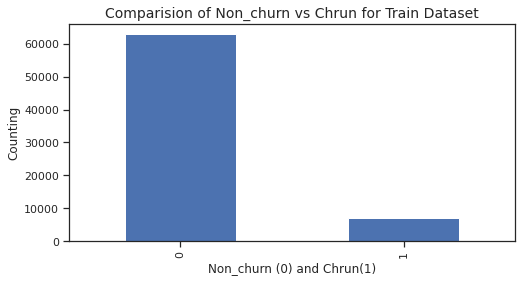

In [366]:
# checking target variable distribution, it only in Train dataset

print(chrun_train['churn_probability'].value_counts())
print('Churn_percentage : {0}%'.format(round(((sum(chrun_train['churn_probability'])/len(chrun_train['churn_probability']))*100),2)))
plt.figure(figsize=(8,4))
chrun_train['churn_probability'].value_counts().plot(kind = 'bar')
plt.ylabel('Counting')
plt.xlabel('Non_churn (0) and Chrun(1)')
plt.title('Comparision of Non_churn vs Chrun for Train Dataset',fontsize=14)

The bar 0 and 1 are Non-chrun and chrun respectivily. We can clearly see that the chrun users are ~10% only. Thus, we can conclude that the dataset is an imbalanced one.

- Imbalanced Data ?

An imbalanced dataset is defined by great differences in the distribution of the classes in the dataset. This means that a dataset is biased towards a class in the dataset. If the dataset is biased towards one class, an algorithm trained on the same data will be biased towards the same class.

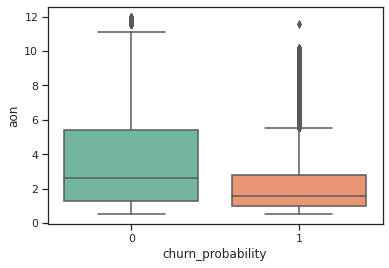

In [367]:
# Convert time on network in number of years from days
chrun_train['aon']=round(((chrun_train['aon']/30)/12),1)
sns.boxplot(y = 'aon', x='churn_probability',palette='Set2', data = chrun_train)

- dataset is higher for 1 to 3 years.
- more chrun observed for 1 to 2 years

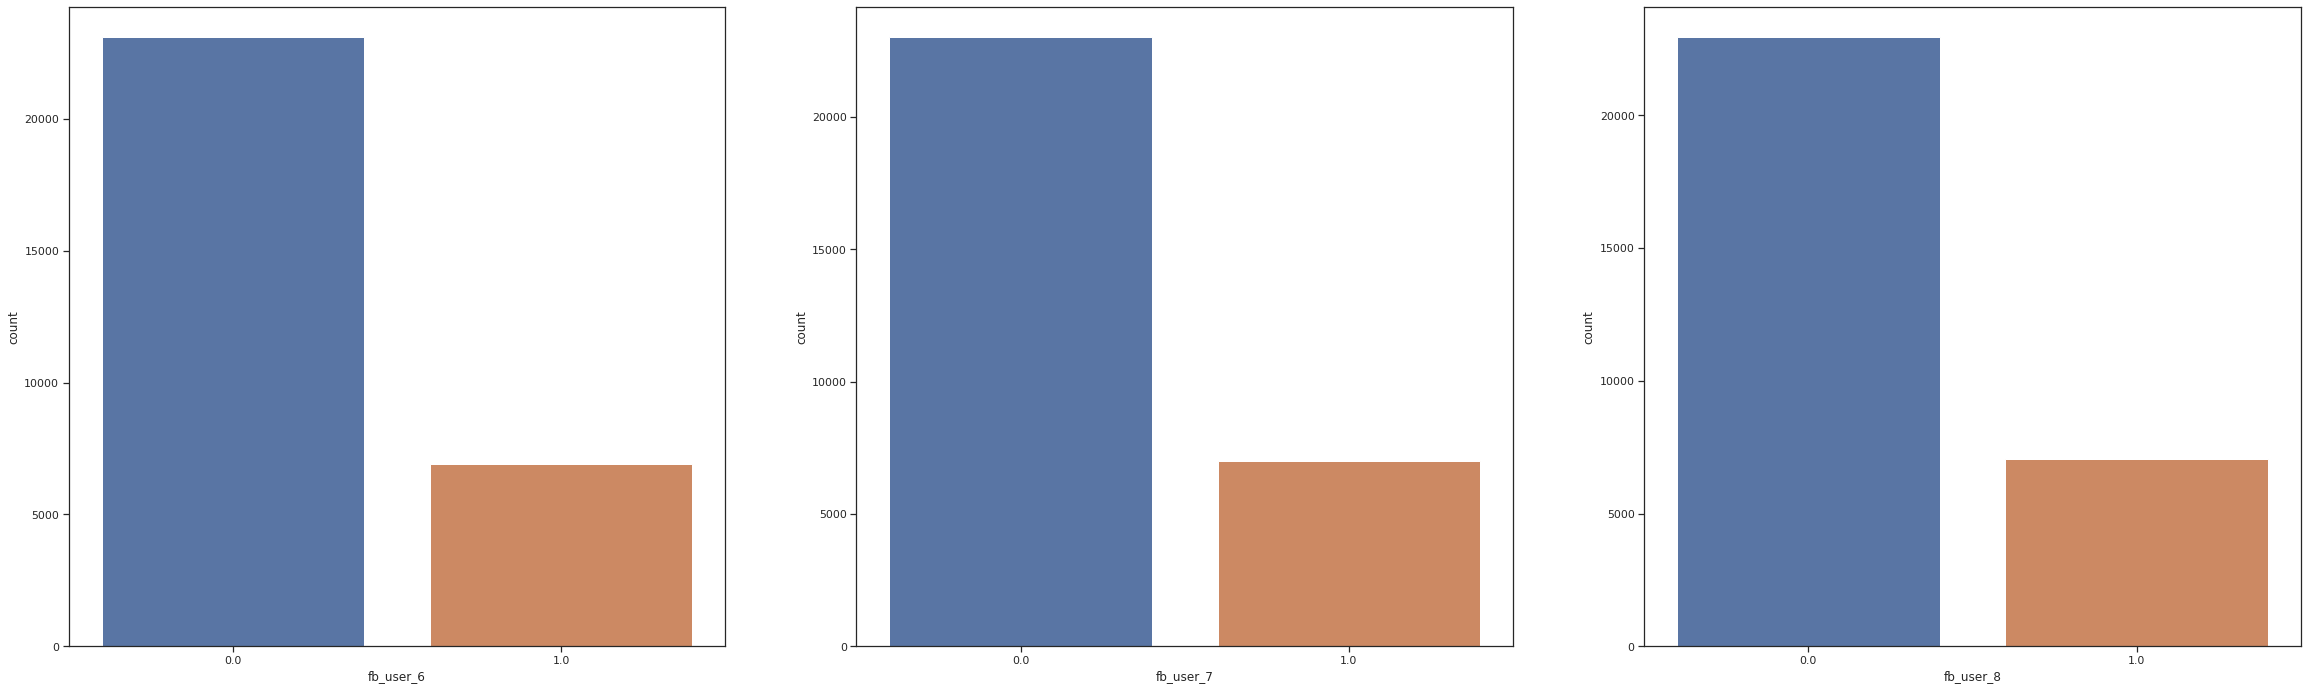

In [368]:
# visualising  Facebook users

plt.subplots(figsize=(40,40))
# Subplot 1
plt.subplot(3,3,1)
sns.countplot(x='fb_user_6' ,data=chrun_train)
# Subplot 2
plt.subplot(3,3,2)
sns.countplot(x='fb_user_7', data=chrun_train)
# Subplot 3
plt.subplot(3,3,3)
sns.countplot(x='fb_user_8', data=chrun_train)

- here 1.0 says user has taken facebook pack. 
- only few users have taken facebook pack

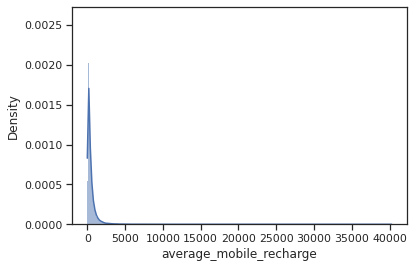

In [369]:
# Checking average_mobile_recharge amount distribution
sns.histplot(chrun_train['average_mobile_recharge'],kde=True,stat='density')


- smaller amount of recharge are most frequent 

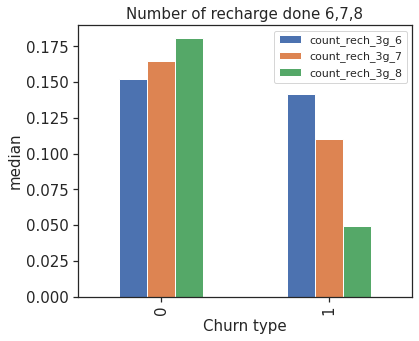

In [370]:
#plot to visualize loc_og_mou (local calls with in same telecom circle)
chrun_train.groupby("churn_probability")['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'].mean().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Number of recharge done 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.show()

- Number of recharge and chrun probability are in reverse proportion

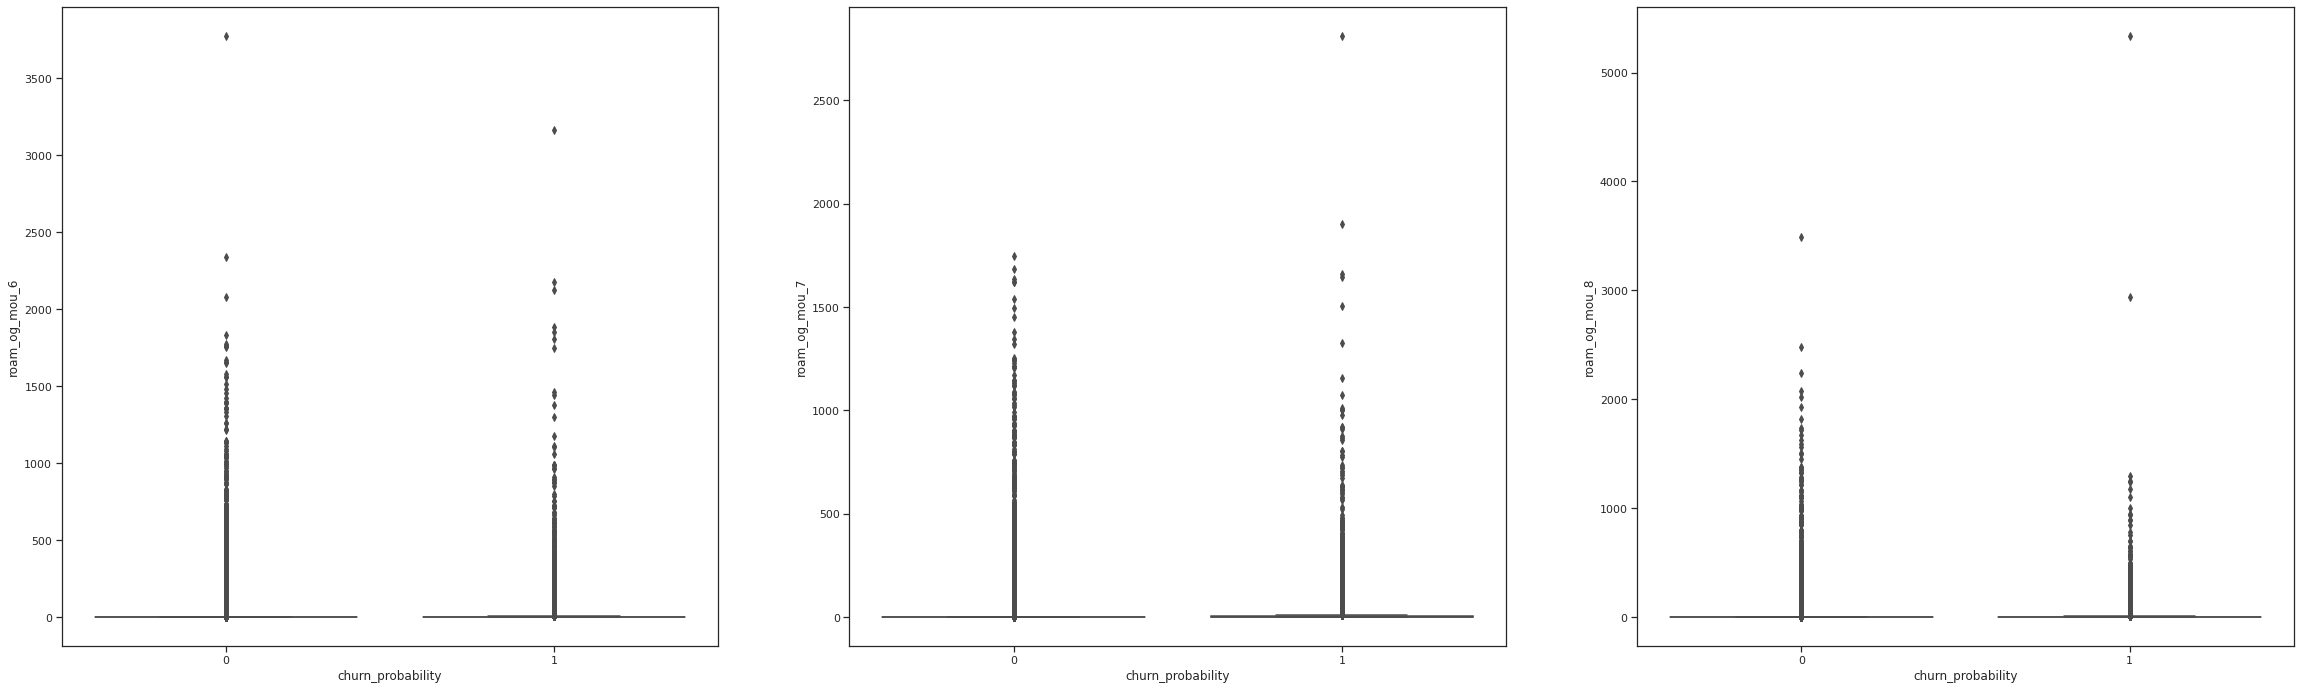

In [371]:
# Max_rech_data features plotting
plt.subplots(figsize=(40,40))
plt.subplot(3,3,1)
sns.boxplot(x='churn_probability', y='roam_og_mou_6', data = chrun_train)
plt.subplot(3,3,2)
sns.boxplot(x='churn_probability', y='roam_og_mou_7', data = chrun_train)
plt.subplot(3,3,3)
sns.boxplot(x='churn_probability', y='roam_og_mou_8', data = chrun_train)

Text(0, 0.5, 'Churn Percentage')

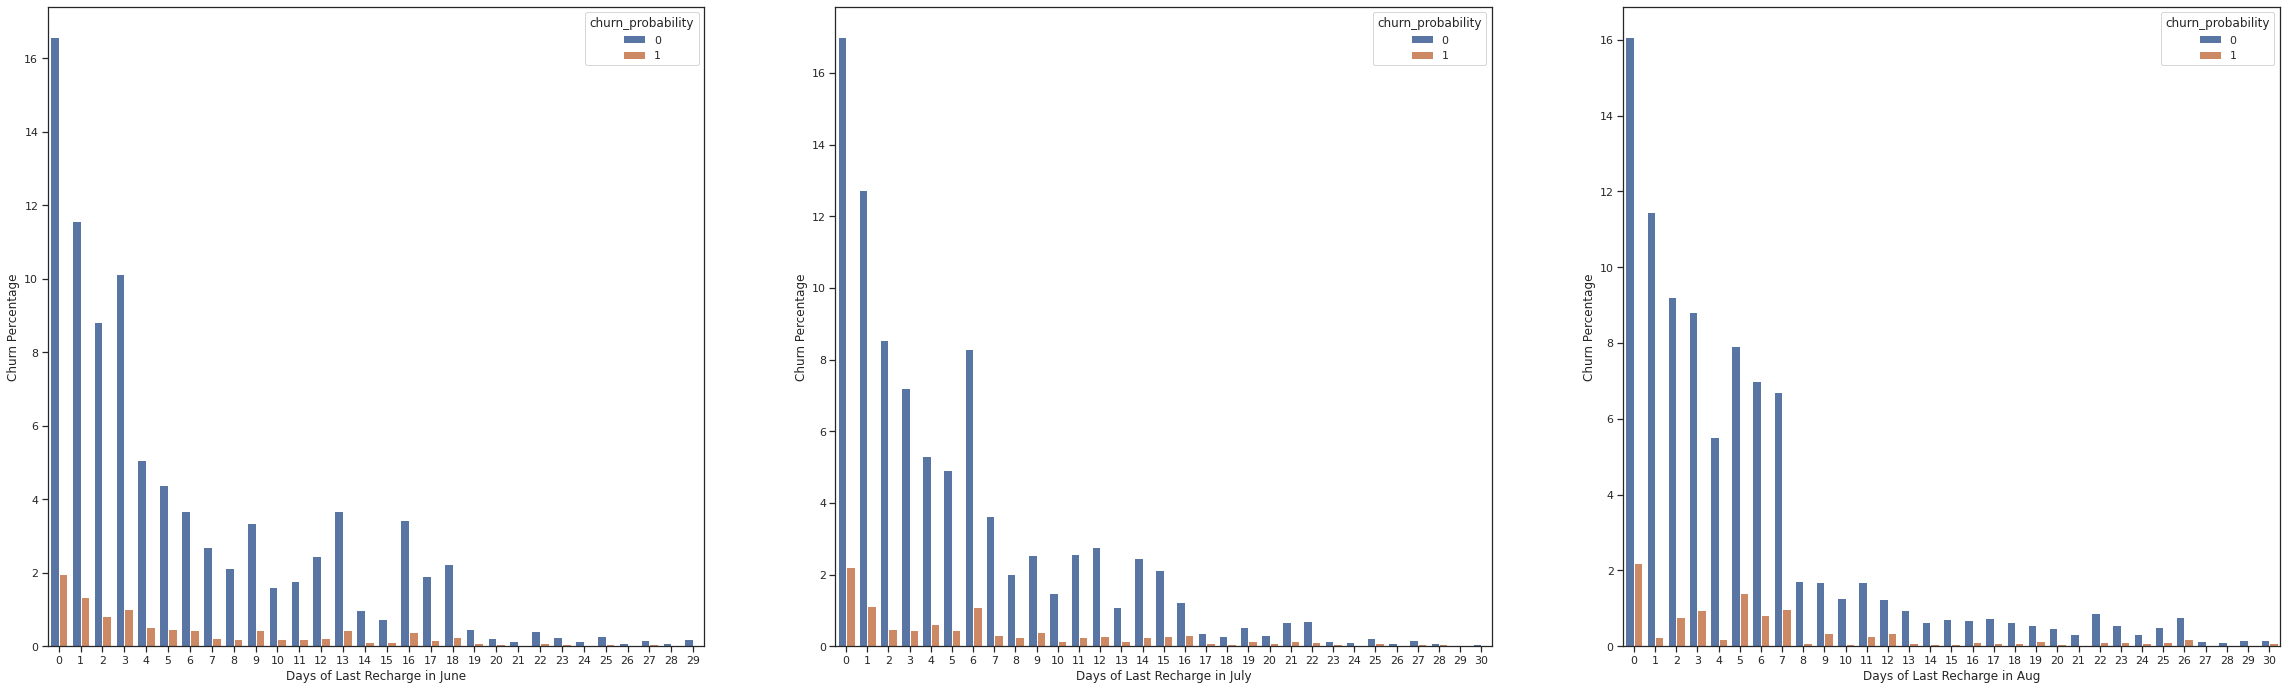

In [372]:
# Checking churn_probability vs last recharge
plt.subplots(figsize=(40,40))
plt.subplot(3,3,1)
sns.barplot(x="Number_of_days_from_last_cellular_recharge_for_6th_month", y="churn_probability", hue="churn_probability", data=chrun_train,estimator=lambda x: len(x) / len(chrun_train) * 100)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Churn Percentage')
plt.subplot(3,3,2)
sns.barplot(x="Number_of_days_from_last_cellular_recharge_for_7th_month", y="churn_probability", hue="churn_probability", data=chrun_train,estimator=lambda x: len(x) / len(chrun_train) * 100)
plt.xlabel('Days of Last Recharge in July')
plt.ylabel('Churn Percentage')
plt.subplot(3,3,3)
sns.barplot(x="Number_of_days_from_last_cellular_recharge_for_8th_month", y="churn_probability", hue="churn_probability", data=chrun_train,estimator=lambda x: len(x) / len(chrun_train) * 100)
plt.xlabel('Days of Last Recharge in Aug')
plt.ylabel('Churn Percentage')

In [373]:
chrun_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,average_of_GPRS_recharge,average_of_cellular_recharge,average_mobile_recharge,Number_of_days_from_last_cellular_recharge_for_6th_month,Number_of_days_from_last_cellular_recharge_for_7th_month,Number_of_days_from_last_cellular_recharge_for_8th_month,Number_of_days_from_last_GPRS_recharge_for_6th_month,Number_of_days_from_last_GPRS_recharge_for_7th_month,Number_of_days_from_last_GPRS_recharge_for_8th_month
count,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00

In [374]:
# Outlier removal method
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [375]:
# Defining a function to remove outlier

def remove_outliers(a):
    
    for i in numaric_columns:
        Quarter1 = a[i].quantile(.01)
        Quarter3 = a[i].quantile(.99)
        IQR = Quarter3-Quarter1 #Inter quartile range (IQR) method
        a =  a[(a[i] >= (Quarter1-(1.5*IQR))) & (a[i] <= (Quarter3+(1.5*IQR)))] 
    return a  

# Removing outlier valures from numaric columns
numaric_columns = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
chrun_train =remove_outliers(chrun_train)
chrun_test =remove_outliers(chrun_test)

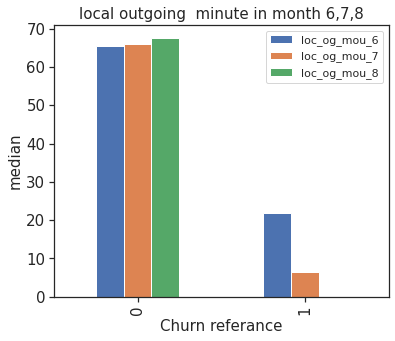

In [376]:
#plot to visualize loc_og_mou (local calls with in same telecom circle)
chrun_train.groupby("churn_probability")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn referance",fontsize=15)
plt.show()

In [377]:
# Creating dummy variable
columns_to_create_dummy_variable=['fb_user_6','fb_user_7','fb_user_8']
chrun_train_dummy = pd.get_dummies(chrun_train[columns_to_create_dummy_variable],drop_first=True)
chrun_test_dummy = pd.get_dummies(chrun_test[columns_to_create_dummy_variable],drop_first=True)

# Merging  dummy variable and original dataset
chrun_train_final = pd.concat([chrun_train,chrun_train_dummy],axis=1)
chrun_test_final = pd.concat([chrun_test,chrun_test_dummy],axis=1)

# Deleting extra columns after dummy variable creation
print(chrun_train_final.shape)
print(chrun_test_final.shape)
#chrun_train_final = chrun_train_final.drop([columns_to_create_dummy_variable],axis=1)
#chrun_test_final = chrun_test_final.drop([columns_to_create_dummy_variable],axis=1)



(69971, 171)
(29985, 170)
(69971, 171)
(29985, 170)


- High-value customers

Those users who have recharged with an amount more than or equal to X, where X is the 60th percentile of the average recharge amount

 Let's first identify high-value customers

In [384]:
# Identifying high value customer
hight_value_user_train=chrun_train_final.loc[chrun_train_final['average_mobile_recharge']>chrun_train_final['average_mobile_recharge'].quantile(0.6),:]
hight_value_user_test=chrun_test_final.loc[chrun_test_final['average_mobile_recharge']>chrun_test_final['average_mobile_recharge'].quantile(0.6),:]

### Data Prepration

In [383]:
# Finally preparing for Model Building
Chrun_train_id=chrun_train_final['id'] # Storing ID column value befor droping for Model Building 
y_chrun_train=chrun_train_final['churn_probability'] # Storing target variable value befor droping for Model Building

chrun_train_final=chrun_train_final.drop(['id','churn_probability'],axis=1)

(69971, 169)

In [387]:
# Scaling up numarical values
scaler = StandardScaler()
numerical_values=chrun_train_final.columns
chrun_train_final[numerical_values] = scaler.fit_transform(chrun_train_final[numerical_values])
chrun_train_final.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_of_GPRS_recharge,average_of_cellular_recharge,average_mobile_recharge,Number_of_days_from_last_cellular_recharge_for_6th_month,Number_of_days_from_last_cellular_recharge_for_7th_month,Number_of_days_from_last_cellular_recharge_for_8th_month,Number_of_days_from_last_GPRS_recharge_for_6th_month,Number_of_days_from_last_GPRS_recharge_for_7th_month,Number_of_days_from_last_GPRS_recharge_for_8th_month,fb_user_6,fb_user_7,fb_user_8
count,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00,69971.00

In [378]:
print(loan)

NameError: ignored

According to the meaning of high worth users are those whose re-energize sum ought to be more than or equivalent to 70th percentile.

Be that as it may, assuming we utilize more prominent than or equivalent to, we wind up getting a little above 30K records as against to 29.9K records.
Thus, in the event that we conisder just more prominent than, we get 29.9K records.
Accordingly we have considered more noteworthy than to channel high worth users

#### arpu (Average Revenue per user)

In [ ]:
# For train Dataset

sns.pairplot(data=chrun_train[['arpu_6','arpu_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='arpu_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='arpu_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test Dataset

sns.pairplot(data=chrun_test[['arpu_6','arpu_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='arpu_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='arpu_6', data=chrun_test, jitter=True, edgecolor="gray")

#### onnet_mou (On network/ within the same network usage)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['onnet_mou_6','onnet_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='onnet_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='onnet_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['onnet_mou_6','onnet_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='onnet_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='onnet_mou_6', data=chrun_test, jitter=True, edgecolor="gray")

#### Offnet_mou (Calls outside of the operator network)

In [ ]:
# for train Dataset

sns.pairplot(data=chrun_train[['offnet_mou_6','offnet_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='offnet_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='offnet_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['offnet_mou_6','offnet_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='offnet_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='offnet_mou_6', data=chrun_test, jitter=True, edgecolor="gray")

#### roam_ic_mou (Customer in roaming zone)

In [ ]:
# for train datset

sns.pairplot(data=chrun_train[['roam_ic_mou_6','roam_ic_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].roam_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].roam_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='roam_ic_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='roam_ic_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['roam_ic_mou_6','roam_ic_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].roam_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].roam_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='roam_ic_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='roam_ic_mou_6', data=chrun_test, jitter=True, edgecolor="gray")

#### loc_og_mou (within the circle outgoing calls)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['loc_og_mou_6','loc_og_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].loc_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].loc_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='loc_og_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='loc_og_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['loc_og_mou_6','loc_og_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].loc_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].loc_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='loc_og_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='loc_og_mou_6', data=chrun_test, jitter=True, edgecolor="gray")

#### std_og_mou (Outside calling circle/zone calls)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['std_og_mou_6','std_og_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].std_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].std_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='std_og_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='std_og_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset


sns.pairplot(data=chrun_test[['std_og_mou_6','std_og_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].std_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].std_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='std_og_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='std_og_mou_6', data=chrun_test, jitter=True, edgecolor="gray")

#### isd_og (international calling)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['isd_og_mou_6','isd_og_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='isd_og_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='isd_og_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['isd_og_mou_6','isd_og_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='isd_og_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='isd_og_mou_6', data=chrun_test, jitter=True, edgecolor="gray")

#### totalog (All outgoing calls by the customer)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['total_og_mou_6','total_og_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='total_og_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='total_og_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['total_og_mou_6','total_og_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='total_og_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='total_og_mou_6', data=chrun_test, jitter=True, edgecolor="gray")

#### locic (incoming local calls)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['loc_ic_mou_6','loc_ic_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].loc_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].loc_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='loc_ic_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='loc_ic_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['loc_ic_mou_6','loc_ic_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].loc_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].loc_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='loc_ic_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='loc_ic_mou_6', data=chrun_test, jitter=True, edgecolor="gray")

#### stdic (Outside circle incoming calls)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['std_ic_mou_6','std_ic_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].std_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].std_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='std_ic_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='std_ic_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['std_ic_mou_6','std_ic_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].std_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].std_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='std_ic_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='std_ic_mou_6', data=chrun_test, jitter=True, edgecolor="gray")


#### totalic (All incoming calls received by a person)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['total_ic_mou_6','total_ic_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].total_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].total_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='total_ic_mou_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='total_ic_mou_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['total_ic_mou_6','total_ic_mou_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].total_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].total_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='total_ic_mou_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='total_ic_mou_6', data=chrun_test, jitter=True, edgecolor="gray")



#### total_rechnum (Number of times a subscriber recharged his mobile)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['total_rech_num_6','total_rech_num_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].total_rech_num_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='total_rech_num_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='total_rech_num_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['total_rech_num_6','total_rech_num_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].total_rech_num_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='total_rech_num_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='total_rech_num_6', data=chrun_test, jitter=True, edgecolor="gray")

#### total_rechamt (Total recharge amount in a particular month)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['total_rech_amt_6','total_rech_amt_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].total_rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].total_rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='total_rech_amt_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='total_rech_amt_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['total_rech_amt_6','total_rech_amt_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_train['about_to_chrun_alert']==1].total_rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].total_rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='total_rech_amt_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='total_rech_amt_6', data=chrun_test, jitter=True, edgecolor="gray")

#### vol_2gmb (Internet usage in MB)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['vol_2g_mb_6','vol_2g_mb_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].vol_2g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].vol_2g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='vol_2g_mb_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='vol_2g_mb_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['vol_2g_mb_6','vol_2g_mb_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].vol_2g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].vol_2g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='vol_2g_mb_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='vol_2g_mb_6', data=chrun_test, jitter=True, edgecolor="gray")

#### vol_3gmb (Internet usage in MB)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['vol_3g_mb_6','vol_3g_mb_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].vol_3g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].vol_3g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='vol_3g_mb_6', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='vol_3g_mb_6', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['vol_3g_mb_6','vol_3g_mb_7','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].vol_3g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].vol_3g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='vol_3g_mb_6', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='vol_3g_mb_6', data=chrun_test, jitter=True, edgecolor="gray")

#### vbc3g (Volume based cost - paid as per usage)

In [ ]:
# for train dataset

sns.pairplot(data=chrun_train[['jun_vbc_3g','jul_vbc_3g','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==1].jun_vbc_3g, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_train[chrun_train['about_to_chrun_alert']==0].jun_vbc_3g, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='jun_vbc_3g', data=chrun_train)
sns.stripplot(x='about_to_chrun_alert', y='jun_vbc_3g', data=chrun_train, jitter=True, edgecolor="gray")

# for test dataset

sns.pairplot(data=chrun_test[['jun_vbc_3g','jul_vbc_3g','about_to_chrun_alert']],hue='about_to_chrun_alert')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==1].jun_vbc_3g, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(chrun_test[chrun_test['about_to_chrun_alert']==0].jun_vbc_3g, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='about_to_chrun_alert', y='jun_vbc_3g', data=chrun_test)
sns.stripplot(x='about_to_chrun_alert', y='jun_vbc_3g', data=chrun_test, jitter=True, edgecolor="gray")

We can see not many data points, which are out of 100th quantile. These can be cansidered at outliers with ranging around 2% to 10%. So these can be removed while model building.

### Feature Engineering

In [ ]:
# checking train dataset

pd.options.display.float_format = '{:.2f}'.format
print(chrun_train.describe())

# checkling for corrilation for train dataset

correlation_check_train = chrun_train.corr()
correlation_checking_train = correlation_check_train.stack().reset_index().sort_values(by = 0, ascending = False)
correlation_checking_train[((correlation_checking_train[0] < 1) & (correlation_checking_train[0] >= 0.4)) | ((correlation_checking_train[0] <= -0.4) & (correlation_checking_train[0] > -1))]



In [ ]:
# checking test dqtaset

pd.options.display.float_format = '{:.2f}'.format
print(chrun_test.describe())

# checkling for corrilation for test dataset

correlation_check_test = chrun_test.corr()
correlation_checking_test = correlation_check_test.stack().reset_index().sort_values(by = 0, ascending = False)
correlation_checking_test[((correlation_checking_test[0] < 1) & (correlation_checking_test[0] >= 0.4)) | ((correlation_checking_test[0] <= -0.4) & (correlation_checking_test[0] > -1))]

- As there is high corrilation between same columns with only difference in month. we can not drop them too as it could result in information loss. so creating an other columns.

In [ ]:
chrun_train['AVG_arpu_6_7'] = chrun_train[['arpu_6','arpu_7']].mean(axis=1)
chrun_train['is_arpu_flag'] = np.where((chrun_train['arpu_8'] > chrun_train['AVG_arpu_6_7']), 0, 1)

chrun_train['AVG_onnet_mou_6_7'] = chrun_train[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
chrun_train['is_onnet_mou_flag'] = np.where((chrun_train['onnet_mou_8'] > chrun_train['AVG_onnet_mou_6_7']), 0, 1)